# Problem Statement
Imagine building a NLP engine that can help predict if a document contains abuse, malignant, defamatory, hateful, racist, fake text or nothing? So this will be a multi-class classification problem which can be converted into n-1 responses (where n = Number of classes), because each document can contain 1 or more classes. Bonus points if you can think of a solution for multiple languages. 

How would you go about mining data for this kind of problem on the web. Site the sources where we can download/scrap or buy data. How would you turn this Active ML problem into a supervised ML Problem? 




**Dataset Used** : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/

**Dataset Explained: <br>**
*Attributes:* "toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"


In [0]:
!pwd

/content/drive/My Drive/Datasets


Change working directory to Dataset folder

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
if os.getcwd() == '/content/drive/My Drive/Datasets':
  pass
else:
  os.chdir('drive/My Drive/Datasets')

***Import Required Libraries***

In [0]:
pip install modAL

In [0]:
pip install -r requirements.txt

In [0]:
import pandas as pd
import numpy as np
import re
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.utils import plot_model
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import json
import nltk
from IPython import display
from statistics import mean 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import modAL
import tqdm
import lime
import scipy
import sklearn
import matplotlib.pyplot as plt
import warnings
from typing import Tuple, List, Any, Union
import numpy as np
from modAL.models import ActiveLearner, Committee
from keras.wrappers.scikit_learn import KerasClassifier
from typing import Callable, Union, List
from modAL.uncertainty import uncertainty_sampling
from functools import partial
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

Import Dataset

In [0]:
data = pd.read_csv('train.csv')

# Preprocessing Data
1. Remove null values
2. Add a new column for (n-1). We add a new column. The new column value will be 1 where all those attributes are 0. This new column will help us with the (n-1) condition.

In [0]:
# Remove na
filter = data["comment_text"] != ""
data = data[filter]
data = data.dropna()

In [0]:
# Add new column
def new_col(row):
    if row['toxic']==0 and row['severe_toxic']==0 and row['obscene']==0 and row['threat']==0 and row['insult']==0 and row['identity_hate']==0:
        val = 1
    else:
        val = 0
    return val

data['good'] = data.apply(new_col,axis=1)

***Text Preprocessing***

In [0]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
data['comment_text'] = data['comment_text'].apply(lambda x: preprocess_text(x))

In [0]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

data['comment_text'] = data['comment_text'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***Visualize Data***

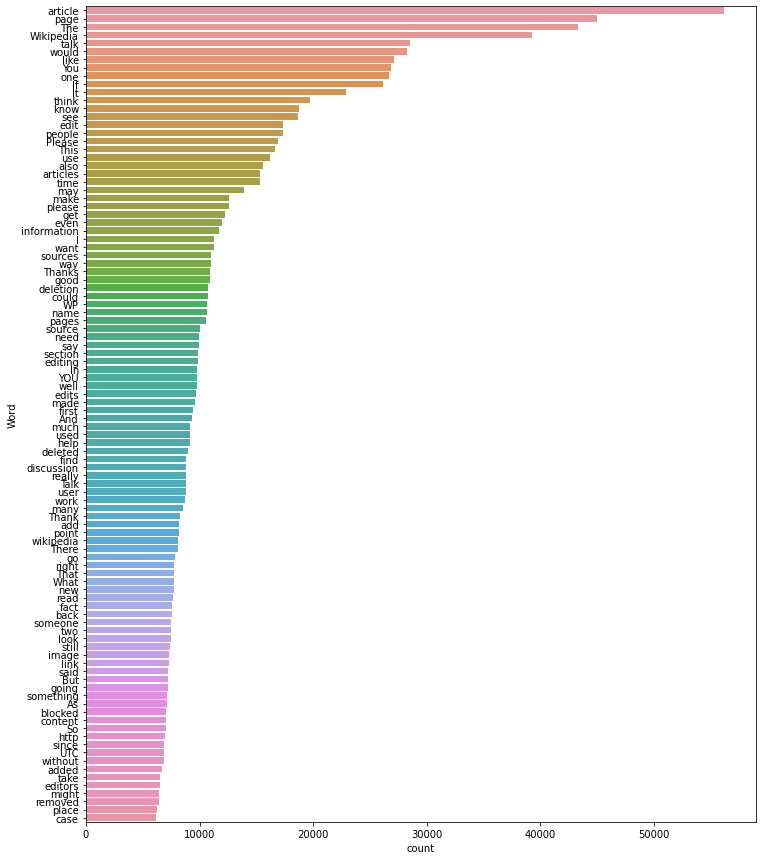

In [0]:
# Word Frequency
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()

freq_words(data['comment_text'], 100)

Text(0.5, 0, '# of categories')

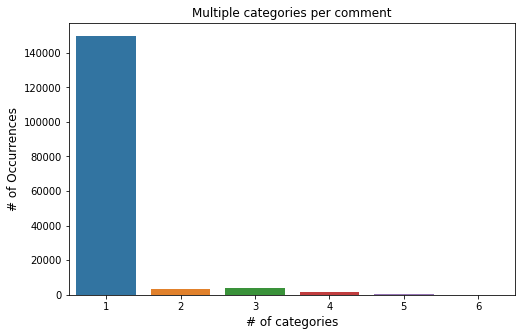

In [0]:
rowsums = data.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

***Input & Output Variables***

In [0]:
X = data.iloc[:,1].values
y = data.iloc[:,[2,3,4,5,6,7,8]].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

# Machine Learning Approach

***Vectorize Text***

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features = 20000
tfidf = TfidfVectorizer(max_features=max_features, stop_words='english')
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.fit_transform(X_test)

***Model Selection***

In [0]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=10000) # Increased max_iter from default due to incresed features
clf = OneVsRestClassifier(lr)

***Predicting***

In [0]:
clf.fit(X_train_tf, y_train)
y_pred = clf.predict(X_test_tf)
print("Accuracy Score: " +str(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:68: FutureWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  def _decorate_fun(self, fun):
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  def _update_doc(self, olddoc):
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  def _update_doc(self, olddoc):
/usr/local/lib/python3.6/dist-packages/sklearn/utils/de

Accuracy Score: 0.8950693104053342


# Deep Learning Approach

***Prepare Text***

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_deep = tokenizer.texts_to_sequences(X_train)
X_test_deep = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train_deep = pad_sequences(X_train_deep, padding='post', maxlen=maxlen)
X_test_deep = pad_sequences(X_test_deep, padding='post', maxlen=maxlen)

***Convert to word embeddings***

Word embeddings like this can be used in multi lingual use cases

In [0]:
embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(7, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 100)          14319200  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 903       
Total params: 14,437,351
Trainable params: 118,151
Non-trainable params: 14,319,200
_________________________________________________________________


***Model Representation***

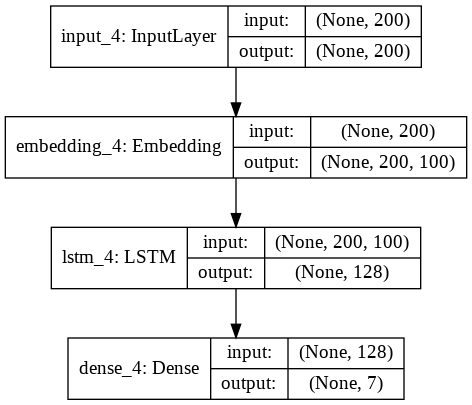

In [0]:
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

***Model Training***

In [0]:
history = model.fit(X_train_deep, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 95742 samples, validate on 23936 samples
Epoch 1/5
95742/95742 [==============================] - 591s 6ms/step - loss: 0.1729 - acc: 0.9543 - val_loss: 0.1554 - val_acc: 0.9578
Epoch 2/5
95742/95742 [==============================] - 591s 6ms/step - loss: 0.1609 - acc: 0.9555 - val_loss: 0.1377 - val_acc: 0.9532
Epoch 3/5
95742/95742 [==============================] - 591s 6ms/step - loss: 0.0887 - acc: 0.9700 - val_loss: 0.0735 - val_acc: 0.9743
Epoch 4/5
95742/95742 [==============================] - 588s 6ms/step - loss: 0.0695 - acc: 0.9761 - val_loss: 0.0693 - val_acc: 0.9756
Epoch 5/5
95742/95742 [==============================] - 587s 6ms/step - loss: 0.0649 - acc: 0.9774 - val_loss: 0.0674 - val_acc: 0.9761


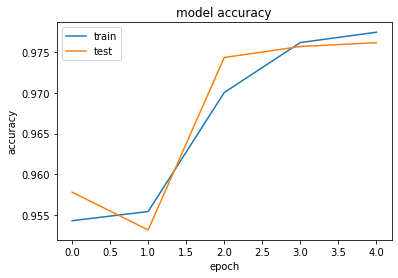

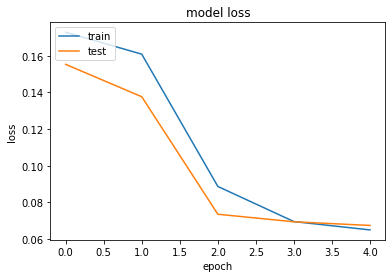

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Active Learning

We are using a library called modAL. But it currently doesn't support multilabel outputs so a ***small edit*** is required in the ***learners.py*** file which took me a long long time to figure out <br>
modAL: https://github.com/modAL-python/modAL

***Prepare small training set***

In [0]:
X_train_tf_small = X_train_tf[:10000]
y_train_small = y_train[:10000]
print(X_train_tf_small.shape)
print(y_train_small.shape)

(10000, 20000)
(10000, 7)


***Prepare small testing set***

In [0]:
X_test_tf_small = X_test_tf[:5000]
y_test_small = y_test[:5000]
print(X_test_tf_small.shape)
print(y_test_small.shape)

(5000, 20000)
(5000, 7)


In [0]:
from scipy import sparse
y_train_sparse = sparse.csr_matrix(y_train_small)
y_test_sparse = sparse.csr_matrix(y_test_small)

***Active Learning Loop***

In [0]:
def passive_sampling(classifier: Any,
                     X: Union[np.ndarray, list],
                     n_instances: int = 1,
                     rng: np.random.RandomState = None) -> Tuple[list, np.ndarray]:
    """
    Passive sampling strategy for AL that picks samples uniformly at random.
    :param classifier: not used
        Messy way of keeping with the query function abstraction
    :param X: np.ndarray, list
        Data pool to pick queries from
    :param n_instances: int, default 1
        Number of instances to pick
    :param rng: np.random.RandomState, optional
        Random number generator to use for seeding
    :return: tuple (list, np.ndarray)
        Tuple with indices of queried samples and the samples themselves
    """

    if rng is not None:
        query_ids = rng.choice(X.shape[0], size=n_instances, replace=False)
    else:
        query_ids = np.random.choice(X.shape[0], size=n_instances, replace=False)

    return query_ids, X[query_ids]


def delete_rows_csr(arr: scipy.sparse.csr_matrix,
                    obj: Union[np.ndarray, list]):
    """
    Deletes rows of a sparse matrix returning the new matrix.
    :param arr: scipy.sparse.csr_matrix
        Matrix from which to delete the rows
    :param obj: 1D np.ndarray, list
        Indices of rows to delete
    :return: scipy.sparse.csr_matrix
        Sparse matrix with rows deleted
    """

    if not isinstance(arr, scipy.sparse.csr_matrix):
        raise ValueError("This function works only for CSR format, try using X.tocsr()")
    obj = list(obj)
    mask = np.ones(arr.shape[0], dtype=bool)
    mask[obj] = False
    return arr[mask]


def plot(scores: List[Union[np.ndarray, list]],
         names: List[str]) -> plt.axes:
    """
    Plotting for AL experiments, supports both single and multiple experiments for each query strategy.
    With multiple experiments it will plot mean and std score at every iteration.
    :param scores: np.ndarray, list
        List of scores for each of the strategies, for a single strategy if the score is 1D it will just plot it,
        if it's 2D it will average over multiple runs nad plot mean and std
    :param names: list
        Names from each of the strategies to use as the legend
    :return: matplotlib.pyplot.axes
        Ax with the plot
    """

    # prepare the plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)

    # X axis for the plot
    budget = len(scores[0])
    t = np.arange(budget)

    # enumerate the query strategies
    for i, values in enumerate(scores):
        assert len(values) == budget

        values = np.array(values)
        if len(values.shape) == 1:  # single experiment
            ax.plot(t, values, label=names[i])
        elif len(values.shape) == 2:  # multiple experiments
            t = np.arange(values.shape[1])
            # calculate mean and std
            mean = np.mean(values, axis=0)
            std = np.std(values, axis=0)
            # plot the moments
            ax.plot(t, mean, label=names[i])
            ax.fill_between(t, mean - std, mean + std, alpha=0.1)

    # set appropriate title
    if len(np.array(scores[0]).shape) == 1:
        title = 'Single run comparision between query strategy'
    elif len(np.array(scores[0]).shape) == 2:
        title = 'Comparision between query strategies averaged over {} runs with std'.format(len(scores[0]))
    else:
        raise ValueError("Unsupported scores shape: {}".format(np.array(scores[0]).shape))

    # add cosmetic stuff
    ax.set_xlabel('Number of Labelled Samples')
    ax.set_ylabel('Test Accuracy')
    ax.set_title(title)
    ax.legend()

    return ax


def committee_decision(votes: Union[np.ndarray, List[int]]) -> np.ndarray:
    """
    Committee voting prediction for binary classification, this function is not recommended for multiclass tasks
    as well as committees with even number of models due to lack of obvious consensus.
    :param votes: np.ndarray, list
        Committee votes for each sample
    :return: np.ndarray
        Prediction on the committee for each sample
    """

    if np.array(votes).shape[1] % 2 == 0:
        warnings.warn("The decision for a committee with even number of models may be not deterministic")

    def f(vote):
        labels, counts = np.unique(vote, return_counts=True)
        return labels[np.argmax(counts)]

    return np.array(list(map(f, votes)), dtype=int)

In [0]:
def active_learning(model: Union[sklearn.base.BaseEstimator, List[sklearn.base.BaseEstimator]],
                    query_strategy: Callable,
                    X: np.ndarray,
                    y: Union[np.ndarray, list],
                    X_test: np.ndarray,
                    y_test: Union[np.ndarray, list],
                    budget: int = 50,
                    warm_start: float = 0.01) -> list:

    # sample the initial training set
    init_ids = np.random.choice(y.shape[0], size=int(warm_start * y.shape[0]), replace=False)
    X_init, y_init = X[init_ids], y[init_ids]
    
    # delete the initial traning set from the pool
    #X = np.delete(X, obj=init_ids)
    X = delete_rows_csr(X, obj=init_ids)
    #y = np.delete(y, obj=init_ids)
    y = delete_rows_csr(y, obj=init_ids)
    
    
    
    # initialize the learner
    if isinstance(model, sklearn.base.BaseEstimator):  # single classifier
        learner = ActiveLearner(estimator=model,
                                X_training=X_init,
                                y_training=y_init,
                                query_strategy=query_strategy)
    elif isinstance(model, list):  # committee
        learner_list = [ActiveLearner(estimator=m,
                                      X_training=X_init,
                                      y_training=y_init) for m in model]
        # create the committee
        learner = Committee(learner_list=learner_list,
                            query_strategy=query_strategy)
        # use bagging to train the committe on bootstraped training sets
        learner.rebag()
    else:
        raise TypeError("Unsupported model type: {}".format(type(model)))
    
    # prepare an empty list for the model scores
    scores = []
    
    # main AL loop
    for i in range(budget):
        # query the learner for a new sample
        query_ids, _ = learner.query(X)
        # "ask" the oracle for labels
        X_query, y_query = X[query_ids], y[query_ids]
        # train the learner using the newly acquired labels
        learner.teach(X=X_query, y=y_query)
        
        # delete the new samples from the pool
        #X = np.delete(X, obj=query_ids)
        X = delete_rows_csr(X, obj=query_ids)
        #y = np.delete(y, obj=query_ids)
        y = delete_rows_csr(y, obj=query_ids)
        
        # evaluate the model and save its performance
        if isinstance(learner, ActiveLearner):
            y_pred = learner.predict(X=X_test)
        elif isinstance(learner, Committee):
            y_pred = Committee(learner.vote(X=X_test))
        
        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)

    return scores

Using only hundred instances due to memory limitations

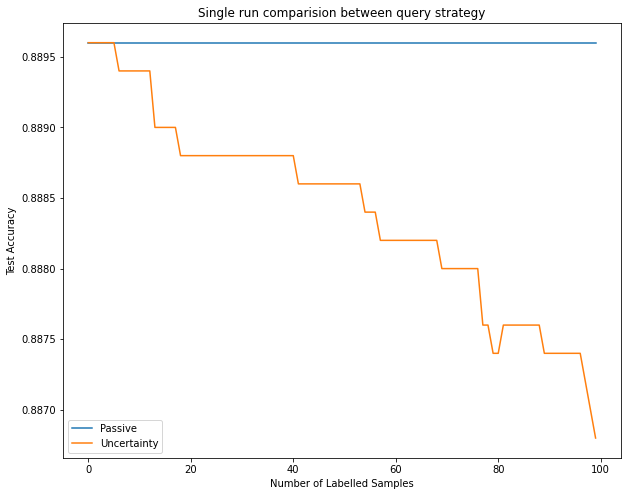

In [0]:
np.random.seed(1337)
budget = 100  # the number of istances that will be queried for labels

# lets simplfy the active_learning function for the ease of use
al = partial(active_learning,
             model=OneVsRestClassifier(LogisticRegression()),
             X=X_train_tf_small, 
             y=y_train_sparse,
             budget=budget,
             X_test=X_test_tf_small,
             y_test=y_test_sparse)

passive_score = al(query_strategy=passive_sampling)
unc_score = al(query_strategy=uncertainty_sampling)

plot([passive_score, unc_score], names=['Passive', 'Uncertainty'])

# Web Scraping to create a dataset

Datasets can be found on Kaggle or UCL repo. But the data we need can be found on sites like reddit, Quora etc. Scraping them will help us create a dataset. They can also be bought from companies and universities.

For this example I'll be scraping data from reddit using a module called ***praw***

In [0]:
pip install praw

     |████████████████████████████████| 153kB 2.7MB/s 
     |████████████████████████████████| 204kB 37.6MB/s 


In [0]:
import praw

In [0]:
reddit = praw.Reddit(client_id='mi7xrg6x8-o2sQ', client_secret='uDVtPKWBw3RdMboHupNbTz_MIVs', user_agent='collect_data')

In [0]:
posts = []
ml_subreddit = reddit.subreddit('Depression')
for post in ml_subreddit.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

In [89]:
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Our most-broken and least-understood rules is ...,2325,doqwow,depression,https://www.reddit.com/r/depression/comments/d...,176,We understand that most people who reply immed...,1.572390e+09
1,Regular Check-In Post,793,exo6f1,depression,https://www.reddit.com/r/depression/comments/e...,4297,Welcome to /r/depression's check-in post - a p...,1.580678e+09
2,Lol my suicide note from 3 years ago was so fo...,551,gq8x7h,depression,https://www.reddit.com/r/depression/comments/g...,33,I recently (like 5 minutes ago) scrolled throu...,1.590433e+09
3,Anyone get this sad feeling when they see/hear...,271,gq3aei,depression,https://www.reddit.com/r/depression/comments/g...,44,"I don't know, it's like this unexplainable fee...",1.590405e+09
4,Being depressed feels safe,17,gqcwtp,depression,https://www.reddit.com/r/depression/comments/g...,4,"I dont want to get better, leave my house, get...",1.590449e+09
5,I wish suicide wasn’t harmful to other people.,1266,gprxmi,depression,https://www.reddit.com/r/depression/comments/g...,121,"If I could take my life, and know that it woul...",1.590364e+09
6,"Life sucks, then you die",30,gq8wnu,depression,https://www.reddit.com/r/depression/comments/g...,2,"For a year now I’ve had migraines, and constan...",1.590432e+09
7,Longing for connection but too tired to connect,164,gq0ucg,depression,https://www.reddit.com/r/depression/comments/g...,31,I have so many unopened texts from ppl but I j...,1.590395e+09
8,Tired from doing nothing,99,gq33kg,depression,https://www.reddit.com/r/depression/comments/g...,17,I feel tired from doing nothing all day. Does ...,1.590404e+09
9,A post from me. Hoping to help you a little bit.,10,gqc5r3,depression,https://www.reddit.com/r/depression/comments/g...,1,"Hi. I'm a boy, never had a girlfriend or succe...",1.590447e+09
